In [1]:
import numpy as np
import math as m
import heapq
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
# центральные прямоугольники со статическим шагом
def crect(f, a, b, npts):
    h = (b - a) / npts
    x = a - 0.5 * h
    summ = 0
    for j in range(npts):
        x += h
        summ += f(x)
    return summ * h

In [3]:
def make_rect(a, b, f):
    """Make a rectangle for the interval [a, b]
        return -area , (left_end, width)"""
    rect = (a, b-a)
    xm = a + rect[1] / 2.
    return (-f(xm) * rect[1], rect)

In [4]:
# центральные прямоугольники со адаптивным шагом
def adapt_crect(f,a,b,npts):
    # сначала нарежем отрезок на нужное кол-во прямоугольников
    # эффективно это делать с помощью кучи
    m_heap = []
    heapq.heappush(m_heap, make_rect(a,b,f))
    for __ in range(npts-1):
        _,t = heapq.heappop(m_heap)
        #print(_,t)
        h = t[0] + t[1]/2 # center
        heapq.heappush(m_heap, make_rect(t[0], h,f))
        #print(make_rect(t[0], h,f))
        heapq.heappush(m_heap, make_rect(h, t[0] + t[1],f))
        #print(make_rect(h, t[1] + t[0],f))
    sum = 0
    for w in m_heap:
        sum -= w[0]
    return sum,m_heap

In [5]:
# интегрируемая функция
def g(x):
    return 1/np.sqrt(x)
def trueg(a,b): # аналитическое решение
    return 2*(np.sqrt(b) - np.sqrt(a))

In [6]:
N = 7
a = 1
b = 5
s, h = adapt_crect(g,a,b,N)

<IPython.core.display.Javascript object>


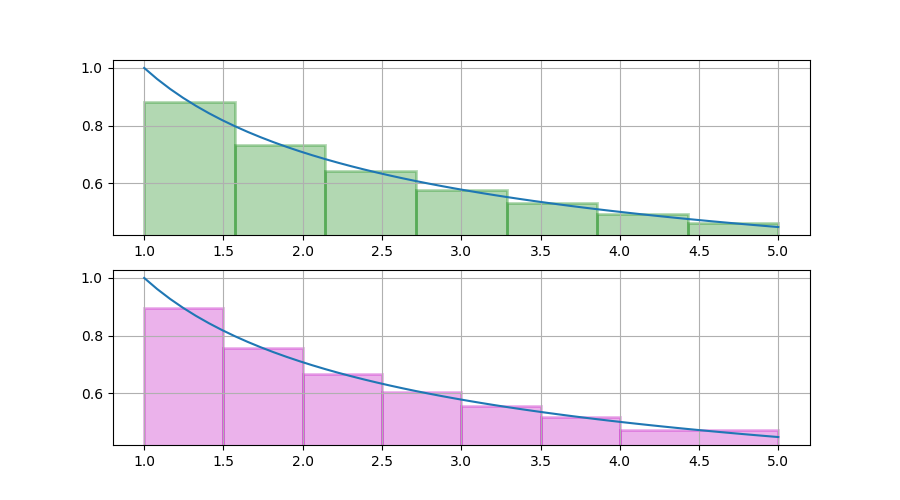

In [7]:
import matplotlib.patches as patches
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(9, 5))
# верхний график crect, ижний adapt_crect
xx = np.linspace(a, b)
ax1.plot(xx, g(xx))
ax1.grid()
w = (b-a)/N
for i in range(N):
    ax1.add_patch(patches.Rectangle((a + i * w, 0), w, g(a + i * (w) + w/2), color='g', alpha=0.3, lw = 2))

ax2.plot(xx, g(xx))
ax2.grid()
for _, t in h:
    ax2.add_patch(patches.Rectangle((t[0], 0), t[1], g(t[0] + t[1]/2), color='m', alpha=0.3, lw = 2))

<IPython.core.display.Javascript object>


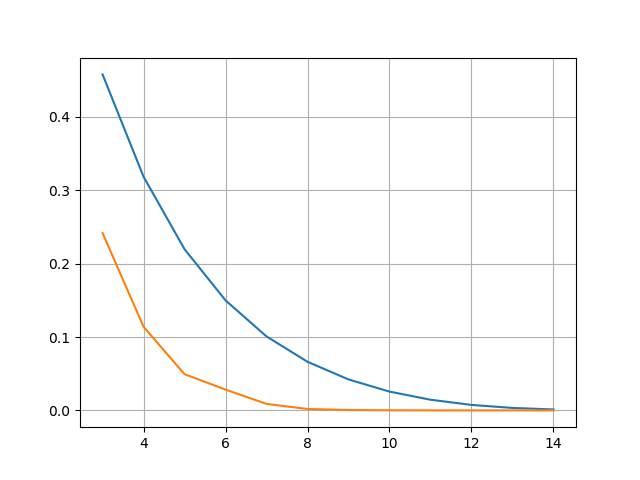

In [14]:
N = 2
a = 0.0001
b = 5
cr = []
adap = []
ans = trueg(a,b)
for i in range(3,15):
    cr.append(abs(crect(g,a,b,N**i) - ans))
    adap.append(abs(adapt_crect(g,a,b,N**i)[0] - ans))

xx = range(3,15)
fig,ax1 = plt.subplots()
ax1.plot(xx, cr,xx,adap)
ax1.grid()
# видно, что адаптивный метод (оражневая линия) дает меньшую ошибку в случае 1/sqrt(x)
# но на других функциях он модет давать более худшую оценку, чем обычный

In [9]:
def f(x):
    return x*x*x
def truef(a,b):
    return (b**4 - a**4)/4

<IPython.core.display.Javascript object>


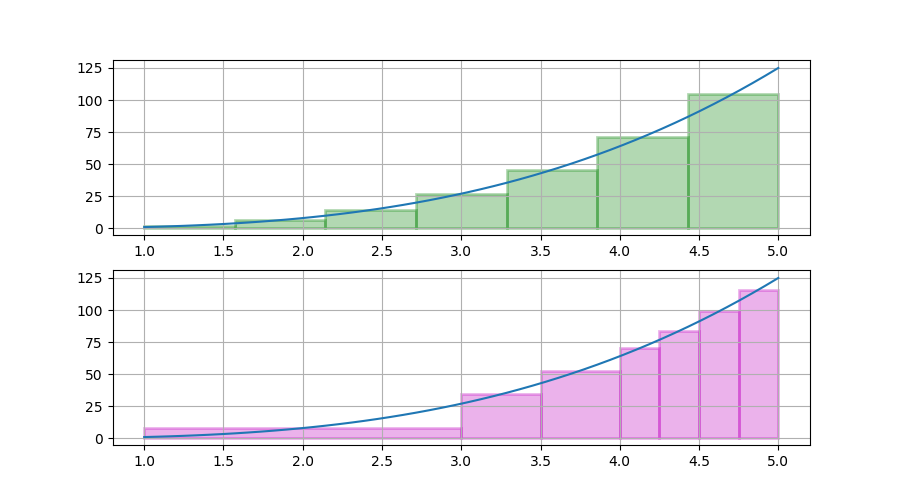

In [10]:
N = 7
a = 1
b = 5
s, h = adapt_crect(f,a,b,N)

import matplotlib.patches as patches
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(9, 5))
# верхний график crect, нижний adapt_crect
xx = np.linspace(a, b)
ax1.plot(xx, f(xx))
ax1.grid()
w = (b-a)/N
for i in range(N):
    ax1.add_patch(patches.Rectangle((a + i * w, 0), w, f(a + i * (w) + w/2), color='g', alpha=0.3, lw = 2))

ax2.plot(xx, f(xx))
ax2.grid()
for _, t in h:
    ax2.add_patch(patches.Rectangle((t[0], 0), t[1], f(t[0] + t[1]/2), color='m', alpha=0.3, lw = 2))
# из этого графика уже видно, что адаптивный метод будет менее точным, изза кривого приближения в левом прямоугольнике

<IPython.core.display.Javascript object>


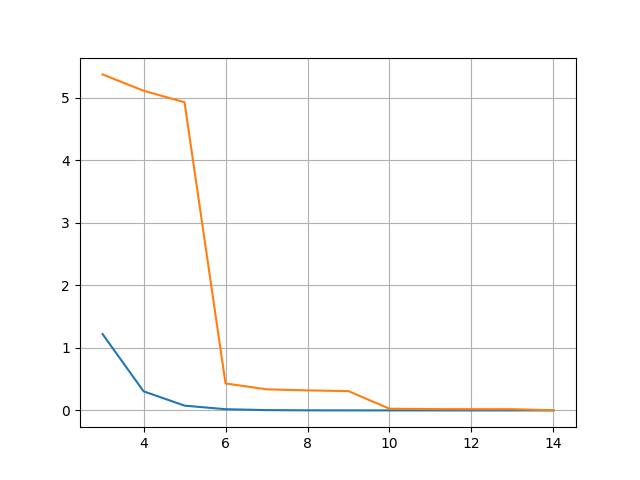

In [15]:
N = 2
a = 0.0001
b = 5
cr = []
adap = []
ans = truef(a,b)
for i in range(3,15):
    cr.append(abs(crect(f,a,b,N**i) - ans))
    adap.append(abs(adapt_crect(f,a,b,N**i)[0] - ans))

xx = range(3,15)
fig,ax1 = plt.subplots()
ax1.plot(xx, cr,xx,adap)
ax1.grid()
# адаптивный метод дает большую ошибку
# резкий перепад можно объяснить тем, что на этом шаге "разбился" самый левый прямоугольник

In [12]:
quad(f,a,b)

(156.25, 1.734723475976807e-12)